<h1 style="color:blue" align="center"> Mini Project </h1>
<h2 style="color:green" align="center"> Bots in the Net: Applying Machine Learning to Identify Social Media Trolls </h2>
<h2 style="color:blue" align="center"> Classify whether a tweet was created by a bot or by human </h2>

-------------

### Company : Technocolabs
### Role : Machine Learning Intern

### Author
Abhinav Anand 

--------------

## Problem Statement
- **classify** whether a tweet was created by a **bot or by human**


- Initial studies made a broad overview detailing the percentage of **twitter users that are bots** and the percentage of **tweets that are made by bots** on Twitter.

## Dataset Information:
### 1. Positive Dataset:
 - Number of Rows : 29,73,371

 - Number of Columns : 15
 
### 2. Negative Dataset:
 - Number of Rows : 7708

 - Number of Columns : 1

### Positive Description

|Variable                   |Definition                                                                                |
|-----------------          |------------------------------------------------------------------------------------------|
|external_author_id         |UniqueID                                                                                  |
|author                  	|-                                                                                         |
|content	                |tweets                                                                                    |
|region  	                |Location                                                                                  |
|language           	    |Tweets in type of Language                                                                |
|publish_date    	        |Which date published in twitter                                                           |
|harvested_date 	        |harvested_date                                                                            |
|following      	        |No of people following in twitter                                                         |
|followers                  |No of followers in twitter                                                                |
|updates    	            |updates                                                                                   |
|post_type      	        |type of post                                                                              |
|account_type   	        |type of twitter account                                                                   |
|new_june_2018     	        |date of twitter account                                                                   |
|retweet                    |retweet         in twitter                                                                |
|account_category           |type of category                                                                          |


### Negative Description

|Feature         |Description                                        |
|------------    |---------------------------------------------------|
|content         |tweets texted                                      |



-----------------------

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [1]:
# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

<h2 style="color:blue" align="left"> 2. Load data </h2>

### i) Dataset :1

In [2]:
df1 = pd.read_csv("IRAhandle_tweets_1.csv")
df2 = pd.read_csv("IRAhandle_tweets_2.csv")
df3 = pd.read_csv("IRAhandle_tweets_3.csv")
df4 = pd.read_csv("IRAhandle_tweets_4.csv")
df5 = pd.read_csv("IRAhandle_tweets_5.csv")
df6 = pd.read_csv("IRAhandle_tweets_6.csv")
df7 = pd.read_csv("IRAhandle_tweets_7.csv")
df8 = pd.read_csv("IRAhandle_tweets_8.csv")
df9 = pd.read_csv("IRAhandle_tweets_9.csv")

In [3]:
# checking dimension (num of rows and columns) of dataset
display(df1.shape, df2.shape, df3.shape, df4.shape, df5.shape, df6.shape, df7.shape, df8.shape, df9.shape)

(381016, 15)

(397232, 15)

(368885, 15)

(388452, 15)

(331821, 15)

(324512, 15)

(365603, 15)

(378295, 15)

(37555, 15)

381016 + 397232 + 368885 + 388452 + 331821 + 324512 + 365603 + 378295 + 37555

### a) Combine input datasets together

In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index=True)

In [5]:
display(df.head(3))
display(df.tail(3))

external_author_id  author  \
0        9.060000e+17  10_GOP   
1        9.060000e+17  10_GOP   
2        9.060000e+17  10_GOP   

                                             content   region language  \
0  "We have a sitting Democrat US Senator on tria...  Unknown  English   
1  Marshawn Lynch arrives to game in anti-Trump s...  Unknown  English   
2  Daughter of fallen Navy Sailor delivers powerf...  Unknown  English   

      publish_date   harvested_date  following  followers  updates post_type  \
0  10/1/2017 19:58  10/1/2017 19:59       1052       9636      253       NaN   
1  10/1/2017 22:43  10/1/2017 22:43       1054       9637      254       NaN   
2  10/1/2017 22:50  10/1/2017 22:51       1054       9637      255   RETWEET   

  account_type  new_june_2018  retweet account_category  
0        Right              0        0       RightTroll  
1        Right              0        0       RightTroll  
2        Right              0        1       RightTroll

external_author_id           author  \
2973368        3.093874e+09  _YOUR_LIFESTYLE   
2973369        3.093874e+09  _YOUR_LIFESTYLE   
2973370        3.093874e+09  _YOUR_LIFESTYLE   

                                                   content   region language  \
2973368  Фотограф Kai-Hendrik Schroeder http://t.co/q0x...  Unknown  Russian   
2973369  К чему стремится компания Netflix (США) http:/...  Unknown  Russian   
2973370  В Петербурге появилось вегетарианское кафе в к...  Unknown  Russian   

           publish_date  harvested_date  following  followers  updates  \
2973368  9/9/2015 18:52  9/9/2015 18:52         60          4      418   
2973369  9/9/2015 22:26  9/9/2015 22:27         60          4      419   
2973370   9/9/2015 8:17   9/9/2015 8:17         60          4      417   

        post_type account_type  new_june_2018  retweet account_category  
2973368       NaN      Russian              0        0       NonEnglish  
2973369       NaN      Russian              0        0       NonEnglish  
2973370       NaN      Russian              0        0       NonEnglish

In [6]:
df.shape

(2973371, 15)

In [7]:
df['content'].head(10)

0    "We have a sitting Democrat US Senator on tria...
1    Marshawn Lynch arrives to game in anti-Trump s...
2    Daughter of fallen Navy Sailor delivers powerf...
3    JUST IN: President Trump dedicates Presidents ...
4    19,000 RESPECTING our National Anthem! #StandF...
5    Dan Bongino: "Nobody trolls liberals better th...
6                          🐝🐝🐝 https://t.co/MorL3AQW0z
7    '@SenatorMenendez @CarmenYulinCruz Doesn't mat...
8    As much as I hate promoting CNN article, here ...
9    After the 'genocide' remark from San Juan Mayo...
Name: content, dtype: object

<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

In [8]:
df.isnull().sum()

external_author_id          4
author                      0
content                     1
region                   8843
language                    0
publish_date                0
harvested_date              0
following                   0
followers                   0
updates                     0
post_type             1662425
account_type              363
new_june_2018               0
retweet                     0
account_category            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973371 entries, 0 to 2973370
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   external_author_id  float64
 1   author              object 
 2   content             object 
 3   region              object 
 4   language            object 
 5   publish_date        object 
 6   harvested_date      object 
 7   following           int64  
 8   followers           int64  
 9   updates             int64  
 10  post_type           object 
 11  account_type        object 
 12  new_june_2018       int64  
 13  retweet             int64  
 14  account_category    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 340.3+ MB


### b) Filter only English tweets

In [8]:
df_english = df.loc[df['language']=='English']

In [9]:
df_english.head()

external_author_id  author  \
0        9.060000e+17  10_GOP   
1        9.060000e+17  10_GOP   
2        9.060000e+17  10_GOP   
3        9.060000e+17  10_GOP   
4        9.060000e+17  10_GOP   

                                             content   region language  \
0  "We have a sitting Democrat US Senator on tria...  Unknown  English   
1  Marshawn Lynch arrives to game in anti-Trump s...  Unknown  English   
2  Daughter of fallen Navy Sailor delivers powerf...  Unknown  English   
3  JUST IN: President Trump dedicates Presidents ...  Unknown  English   
4  19,000 RESPECTING our National Anthem! #StandF...  Unknown  English   

      publish_date   harvested_date  following  followers  updates post_type  \
0  10/1/2017 19:58  10/1/2017 19:59       1052       9636      253       NaN   
1  10/1/2017 22:43  10/1/2017 22:43       1054       9637      254       NaN   
2  10/1/2017 22:50  10/1/2017 22:51       1054       9637      255   RETWEET   
3  10/1/2017 23:52  10/1/2017 23:52       1062       9642      256       NaN   
4   10/1/2017 2:13   10/1/2017 2:13       1050       9645      246   RETWEET   

  account_type  new_june_2018  retweet account_category  
0        Right              0        0       RightTroll  
1        Right              0        0       RightTroll  
2        Right              0        1       RightTroll  
3        Right              0        0       RightTroll  
4        Right              0        1       RightTroll

In [10]:
df_english.shape

(2128963, 15)

In [11]:
df_english['language'].value_counts()

English    2128963
Name: language, dtype: int64

In [12]:
df_english['content'].isnull().sum()

1

In [13]:
df_english['content'] = df_english['content'].fillna(df_english['content'].mode()[0])

In [14]:
df_english['content'].isnull().sum()

0

In [15]:
df_content = pd.DataFrame(df_english['content'])
df_content.head()

content
0  "We have a sitting Democrat US Senator on tria...
1  Marshawn Lynch arrives to game in anti-Trump s...
2  Daughter of fallen Navy Sailor delivers powerf...
3  JUST IN: President Trump dedicates Presidents ...
4  19,000 RESPECTING our National Anthem! #StandF...

In [16]:
df_content.shape

(2128963, 1)

In [17]:
temp1 = np.ones(len(df_content))

In [18]:
df_content['label'] = temp1
df_content.head()

content  label
0  "We have a sitting Democrat US Senator on tria...    1.0
1  Marshawn Lynch arrives to game in anti-Trump s...    1.0
2  Daughter of fallen Navy Sailor delivers powerf...    1.0
3  JUST IN: President Trump dedicates Presidents ...    1.0
4  19,000 RESPECTING our National Anthem! #StandF...    1.0

In [19]:
df_content['label'] = df_content['label'].astype(int)

In [20]:
df_content.shape

(2128963, 2)

In [21]:
df_content_shuffle = df_content.take(np.random.permutation(len(df_content))[:10000])
df_content_shuffle.head()

content  label
169324   NBC BUSTED Calling Disgraced Dem Senator Menen...      1
724534   “Weird Al” Yankovic joins Denver Comic Con’s 2...      1
2304506  One person wounded after Wednesday afternoon s...      1
1385246  1 thing we in 'The Black Fist' love is telling...      1
777979   #sports Giants' Eight-Game Win Streak Snapped ...      1

In [22]:
df_content.isnull().sum()

content    0
label      0
dtype: int64

### i) Dataset :2

### a) Labels: Negative tweets

In [23]:
label = pd.read_csv("tweets-2016-10000-textonly.txt", delimiter='\t', names=['content'])

In [24]:
display(label.head())
display(label.tail())

content
0  Leaked records show Trump may have avoided tax...
1  Donald Trump vs. Hillary Clinton Debate Cold O...
2  @realDonaldTrump The need is to blow off the "...
3  US-Medien: Trump zahlte womöglich jahrelang ke...
4  #amjoy #cnn #msnbc #Trump has 2 words for #dep...

content
7574  Since 1986-2016(30Years) =20Years Republican A...
7575  Onlooker repeatedly yells ‘Bill Clinton is a r...
7576  I'm having a very hard time right now in sever...
7577  Between #trump, Giuliani, Ailes they have 10 d...
7578  Larry David brings Bernie Sanders back to ‘SNL...

In [25]:
label.shape

(7579, 1)

In [26]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7579 entries, 0 to 7578
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  7579 non-null   object
dtypes: object(1)
memory usage: 59.3+ KB


In [27]:
temp2 = np.zeros(len(label))
label['label'] = temp2

In [28]:
label['label'] = label['label'].astype(int)
label.head()

content  label
0  Leaked records show Trump may have avoided tax...      0
1  Donald Trump vs. Hillary Clinton Debate Cold O...      0
2  @realDonaldTrump The need is to blow off the "...      0
3  US-Medien: Trump zahlte womöglich jahrelang ke...      0
4  #amjoy #cnn #msnbc #Trump has 2 words for #dep...      0

In [29]:
label.shape

(7579, 2)

In [30]:
label.isnull().sum()

content    0
label      0
dtype: int64

### iv) Final dataframe only with 'content'

In [31]:
tweets = pd.concat([df_content_shuffle, label], ignore_index=True)

In [32]:
tweets.head()

content  label
0  NBC BUSTED Calling Disgraced Dem Senator Menen...      1
1  “Weird Al” Yankovic joins Denver Comic Con’s 2...      1
2  One person wounded after Wednesday afternoon s...      1
3  1 thing we in 'The Black Fist' love is telling...      1
4  #sports Giants' Eight-Game Win Streak Snapped ...      1

In [33]:
tweets.shape

(17579, 2)

In [34]:
tweets.isnull().sum()

content    0
label      0
dtype: int64

In [35]:
tweets = tweets.sample(frac = 1).reset_index(drop=True)
tweets.head(10)

content  label
0  #AllLivesMatter/ #BlackLivesMatter PSA #5 Well...      1
1  White people trying to figure out how to decol...      1
2  I've never voted before. But this year Ill be ...      0
3  #jobb North Korea Tensions Lead Gold Prices So...      1
4  Alec Baldwin Just Impersonated Trump On SNL, A...      0
5  If he'd committed sexual assault he'd be facin...      1
6  Why are you sleeping on this?!?! https://t.co/...      1
7  Correct me if I am wrong but with Trump's tax ...      0
8  #GeorgesBernanos: It’s a fine thing to rise ab...      1
9   Pleasure in the job puts perfection in the work.      1

In [36]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17579 entries, 0 to 17578
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  17579 non-null  object
 1   label    17579 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 206.1+ KB


In [37]:
tweets['content'] = tweets['content'].astype(str)

In [38]:
tweets['label'].value_counts()

1    10000
0     7579
Name: label, dtype: int64

### Data Visualisation

### a. account_category

In [40]:
df['account_category'].nunique()

8

In [41]:
df['account_category'].value_counts()

NonEnglish      837725
RightTroll      719087
NewsFeed        599294
LeftTroll       427811
HashtagGamer    241827
Commercial      122582
Unknown          13905
Fearmonger       11140
Name: account_category, dtype: int64

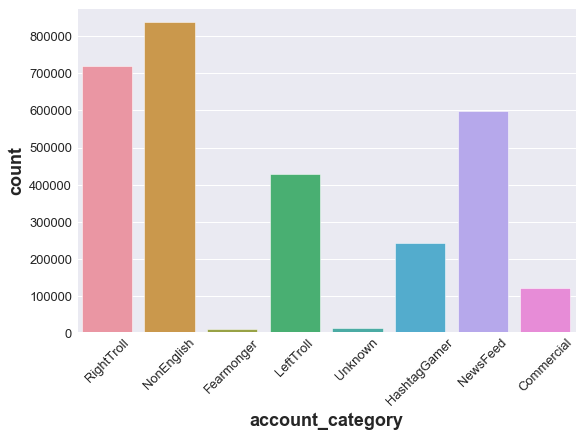

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(df['account_category'])
plt.xlabel("account_category", fontsize=18, fontweight="bold")
plt.ylabel("count", fontsize=18, fontweight="bold")
plt.xticks(fontsize=13, rotation=45)
plt.yticks(fontsize=13)
plt.show()

### b. account_type

In [43]:
df['account_type'].nunique()

20

In [44]:
df['account_type'].value_counts()

Russian       721191
Right         718619
local         460197
left          427811
Hashtager     241827
news          139097
Commercial    122582
German         91851
Italian        15899
?              13542
Koch           10894
Arabic          6229
Spanish         1314
French          1117
right            468
ZAPOROSHIA       175
Portuguese       118
Ebola             71
Ukranian           4
Uzbek              2
Name: account_type, dtype: int64

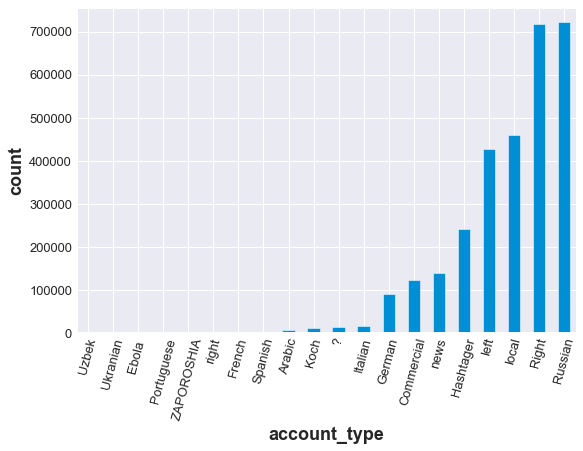

In [45]:
plt.figure(figsize=(8,6))
df['account_type'].value_counts().sort_values(ascending=True).plot.bar()
plt.xlabel("account_type", fontsize=18, fontweight="bold")
plt.ylabel("count", fontsize=18, fontweight="bold")
plt.xticks(fontsize=13, rotation=75)
plt.yticks(fontsize=13)
plt.show()

### c. post_type

In [46]:
df['post_type'].nunique()

2

In [47]:
df['post_type'].value_counts()

RETWEET        1270702
QUOTE_TWEET      40244
Name: post_type, dtype: int64

### d. region

In [48]:
df['region'].nunique()

36

In [49]:
df['region'].value_counts()

United States                2055882
Unknown                       572767
Azerbaijan                    100755
United Arab Emirates           74908
Russian Federation             37637
Belarus                        29619
Germany                        27192
United Kingdom                 18062
Italy                          13494
Iraq                           11219
Ukraine                         6272
Malaysia                        4933
Afghanistan                     4889
Israel                          3606
France                           942
Canada                           608
Iran, Islamic Republic of        541
Spain                            515
Egypt                            232
Japan                            110
Greece                            91
Saudi Arabia                      55
Sweden                            52
Mexico                            41
Samoa                             32
India                             22
Finland                           20
T

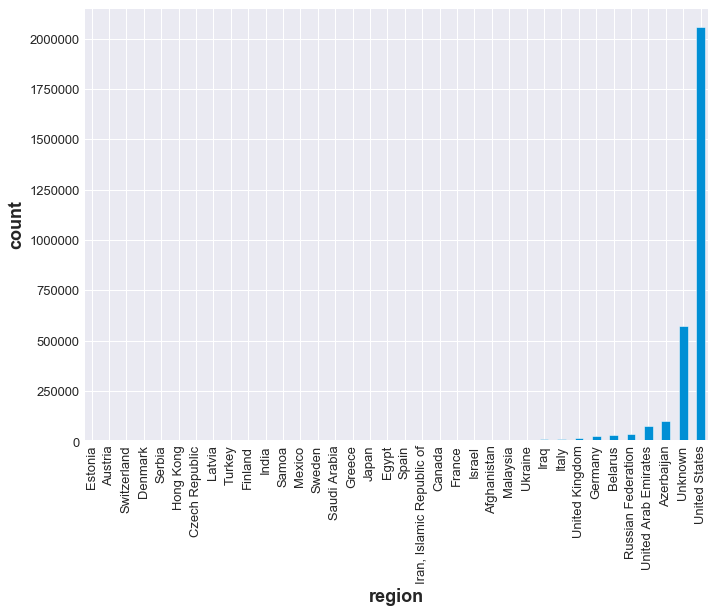

In [50]:
plt.figure(figsize=(10,8))
df['region'].value_counts().sort_values(ascending=True).plot.bar()
plt.xlabel("region", fontsize=18, fontweight="bold")
plt.ylabel("count", fontsize=18, fontweight="bold")
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13)
plt.show()

### e. language

In [51]:
df['language'].nunique()

56

In [52]:
df['language'].value_counts()

English                2128963
Russian                 624124
German                   87171
Ukrainian                39361
Italian                  18254
Serbian                   9615
Uzbek                     9491
Bulgarian                 9458
LANGUAGE UNDEFINED        8325
Arabic                    7595
Macedonian                5260
French                    4572
Spanish                   3145
Norwegian                 2252
Farsi (Persian)           1685
Romanian                  1631
Dutch                     1167
Swedish                   1021
Vietnamese                 990
Estonian                   771
Japanese                   766
Catalan                    590
Finnish                    581
Albanian                   572
Croatian                   546
Icelandic                  499
Pushto                     488
Portuguese                 465
Turkish                    445
Lithuanian                 417
Polish                     386
Somali                     277
Slovak  

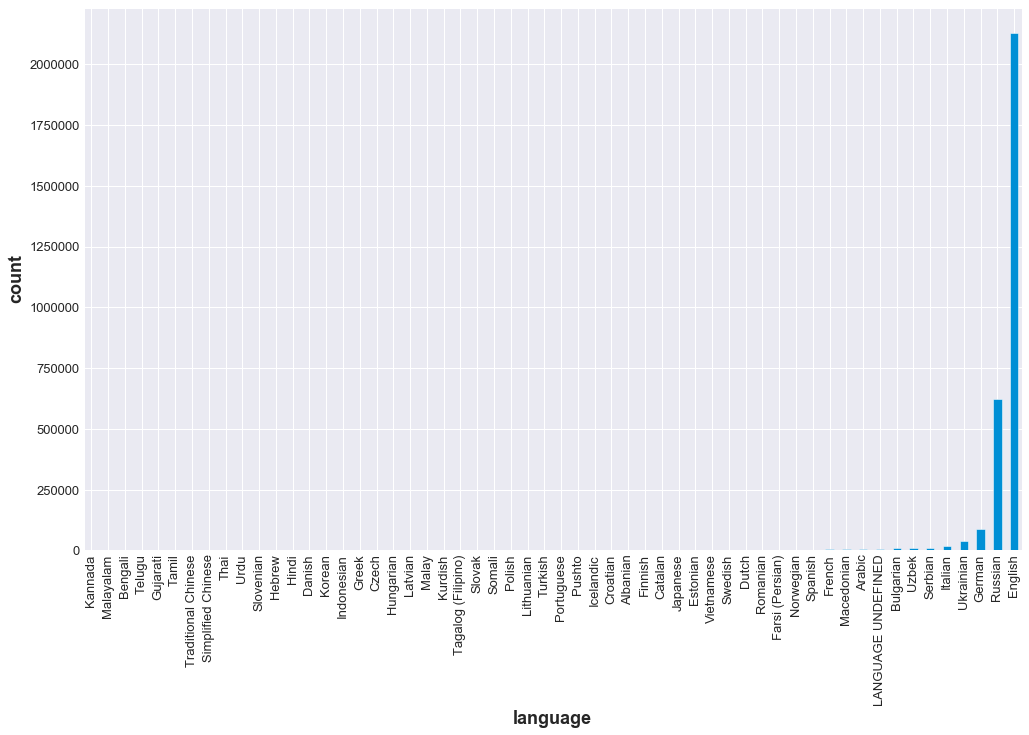

In [53]:
plt.figure(figsize=(15,10))
df['language'].value_counts().sort_values(ascending=True).plot.bar()
plt.xlabel("language", fontsize=18, fontweight="bold")
plt.ylabel("count", fontsize=18, fontweight="bold")
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13)
plt.show()

### f. Negative tweets

In [54]:
label['content'].nunique()

7638

In [55]:
label['content'].head()

0    Leaked records show Trump may have avoided tax...
1    Donald Trump vs. Hillary Clinton Debate Cold O...
2    @realDonaldTrump The need is to blow off the "...
3    US-Medien: Trump zahlte womöglich jahrelang ke...
4    #amjoy #cnn #msnbc #Trump has 2 words for #dep...
Name: content, dtype: object

In [56]:
label['content'].value_counts()

💩                                                                                                                                               12
@realDonaldTrump                                                                                                                                 6
“Trek against Trump” urges voters to choose Hillary Clinton:                                                                                     5
Obama Tak Sabar Menunggu Bill Clinton Naik Pesawat: Ayo Pulang!:                                                                                 5
https://t.co/DSNENwnv7u                                                                                                                          4
                                                                                                                                                ..
Trump sex tape comments frustrate GOP supporters: Donald Trump’s middle-of-the-night tweets about a… https://t.co/q4Dz

---------------

<h2 style="color:blue" align="left"> 4. Text Cleaning or Preprocessing </h2>

from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [39]:
# library to clean the text 
import re  
  
# Natural Language Tool Kit 
import nltk  
  
# stopwords is a list of unwanted words like the,and,of,etc...
nltk.download('stopwords') 
  
# to remove stopword; corpus is a collection of text.
from nltk.corpus import stopwords 
  
# for Stemming propose  
# Stemming means taking the root of the word eg. loved, loving, will love -> love
# This will reduce different versions of the same word and will hence reduce the sparsity of matrix
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepusuresh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Initialize empty array to append clean text  
corpus = []

# creating PorterStemmer object to take main stem of each word
ps = PorterStemmer()

# 17708 (reviews) rows to clean 
for i in range(0, len(tweets)):         
    
    # remove html tags
    review = re.sub(r"http\S+","", tweets['content'][i])
    
    # remove special characters
    review = re.sub('[^a-zA-Z]+', ' ', review)
          
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # loop for stemming each word in string array at ith row     
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] 
    
    # rejoin all string array elements to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create array of clean text  
    corpus.append(review)  

In [41]:
corpus

['alllivesmatt blacklivesmatt psa well fargo bank defraud mn chariti goe jail mngop minnesotadfl',
 'white peopl tri figur decolon without return land ndn pay black ppl repar',
 'never vote year ill vote vote trump',
 'jobb north korea tension lead gold price soar job',
 'alec baldwin imperson trump snl hilari',
 'commit sexual assault face seriou ramif nfl toler player speak injustic',
 'sleep',
 'correct wrong trump tax plan famili taxabl incom k tax liabil doubl eek',
 'georgesbernano fine thing rise pride quot quot',
 'pleasur job put perfect work',
 'plain cigarett packag could drive briton quit smoke',
 'watch trump launch person attack hillari clinton',
 'upi cvoter poll trump regain lead clinton septemb end',
 'chelsea clinton slip may said someth end hillari career video',
 'hear philli pollwatch testifi elect judg push pole place',
 'fact wealth inequ return level seen sinc roar fightfor',
 'thought bbc publish polit correct nonsens',
 'trump mild compar bill clinton bill nee

<h2 style="color:blue" align="left"> 5. Making the bag of words via sparse matrix </h2>

- **Count Vectorization** is used to **convert** given text into a **vector** on the basis of the **frequency (count) of each word** that occurs in the entire text.

In [42]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 
  
# To extract max 1800 feature. "max_features" is attribute to experiment with to get better results 
cv = CountVectorizer(max_features = 1800)  
  
# X contains corpus (dependent variable) 
X = cv.fit_transform(corpus).toarray()  
  
# y contains answers if review is positive or negative 
y = tweets.iloc[:, 1].values

In [43]:
# split  data into training and testing sets of 70:30 ratio
# 20% of test size selected
# random_state is random seed
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [44]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14063, 1800) (3516, 1800) (14063,) (3516,)


<h2 style="color:blue" align="left"> 6. Model building and Evaluation </h2>

### a) Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [46]:
y_pred_GNB = classifier.predict(X_test)

In [47]:
print("Train Score {:.2f} & Test Score {:.2f}".format(classifier.score(X_train, y_train), classifier.score(X_test, y_test)))

Train Score 0.87 & Test Score 0.86


In [48]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_GNB)
cm

array([[1198,  298],
       [ 193, 1827]], dtype=int64)

In [49]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1496
           1       0.86      0.90      0.88      2020

    accuracy                           0.86      3516
   macro avg       0.86      0.85      0.86      3516
weighted avg       0.86      0.86      0.86      3516



### b) Random Forest

In [50]:
# Fitting Random Forest Classification to the Training set 
from sklearn.ensemble import RandomForestClassifier 
  
# n_estimators can be said as number of trees, experiment with n_estimators to get better results  
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 7) 
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

In [51]:
# Predicting the Test set results 
y_pred_model = model.predict(X_test) 

In [52]:
print("Train Score {:.2f} & Test Score {:.2f}".format(model.score(X_train, y_train), model.score(X_test, y_test)))

Train Score 0.98 & Test Score 0.89


In [53]:
# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_model) 
cm 

array([[1410,   86],
       [ 316, 1704]], dtype=int64)

In [54]:
# Classification report
print(classification_report(y_test, y_pred_model))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1496
           1       0.95      0.84      0.89      2020

    accuracy                           0.89      3516
   macro avg       0.88      0.89      0.88      3516
weighted avg       0.89      0.89      0.89      3516



### c) Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
DCT = DecisionTreeClassifier()
DCT.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
# Predicting the Test set results 
y_pred_DCT = DCT.predict(X_test) 

In [57]:
print("Train Score {:.2f} & Test Score {:.2f}".format(DCT.score(X_train, y_train), DCT.score(X_test, y_test)))

Train Score 0.98 & Test Score 0.84


In [58]:
# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_DCT) 
cm 

array([[1345,  151],
       [ 420, 1600]], dtype=int64)

In [59]:
# Classification report
print(classification_report(y_test, y_pred_DCT))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1496
           1       0.91      0.79      0.85      2020

    accuracy                           0.84      3516
   macro avg       0.84      0.85      0.84      3516
weighted avg       0.85      0.84      0.84      3516



### d) Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Predicting the Test set results 
y_pred_LR = LR.predict(X_test) 

In [62]:
print("Train Score {:.2f} & Test Score {:.2f}".format(LR.score(X_train, y_train), LR.score(X_test, y_test)))

Train Score 0.92 & Test Score 0.89


In [63]:
# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_LR) 
cm 

array([[1265,  231],
       [ 144, 1876]], dtype=int64)

In [64]:
# Classification report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1496
           1       0.89      0.93      0.91      2020

    accuracy                           0.89      3516
   macro avg       0.89      0.89      0.89      3516
weighted avg       0.89      0.89      0.89      3516



### e) SVM

In [65]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [66]:
# Predicting the Test set results 
y_pred_svm = svm.predict(X_test) 

In [67]:
print("Train Score {:.2f} & Test Score {:.2f}".format(svm.score(X_train, y_train), svm.score(X_test, y_test)))

Train Score 0.94 & Test Score 0.90


In [68]:
# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_svm)  
cm 

array([[1290,  206],
       [ 149, 1871]], dtype=int64)

In [69]:
# Classification report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1496
           1       0.90      0.93      0.91      2020

    accuracy                           0.90      3516
   macro avg       0.90      0.89      0.90      3516
weighted avg       0.90      0.90      0.90      3516



### f) XGBoost

In [70]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
# Predicting the Test set results 
y_pred_xgb = xgb.predict(X_test) 

In [72]:
print("Train Score {:.2f} & Test Score {:.2f}".format(xgb.score(X_train, y_train), xgb.score(X_test, y_test)))

Train Score 0.91 & Test Score 0.90


In [73]:
# Making the C# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_xgb)  
cm

array([[1283,  213],
       [ 155, 1865]], dtype=int64)

In [74]:
# Classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1496
           1       0.90      0.92      0.91      2020

    accuracy                           0.90      3516
   macro avg       0.89      0.89      0.89      3516
weighted avg       0.90      0.90      0.90      3516



-----------------

#### Naive Bayes
- Accuracy on Test Data Set with Naive Bayes : 86%

#### Random Forest
- Accuracy on Test Data Set with Random Forest : 89%

#### Decision Tree
- Accuracy on Test Data Set with Decision Tree : 84%

#### Logistic Regression
- Accuracy on Test Data Set with Logistic Regression : 89%

#### SVM
- Accuracy on Test Data Set with SVM : 90%

#### XGBoost
- Accuracy on Test Data Set with XGBoost : 90%

- So far **SVM & XGBoost** proved to be the best performing model with **90% accuracy.**